In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


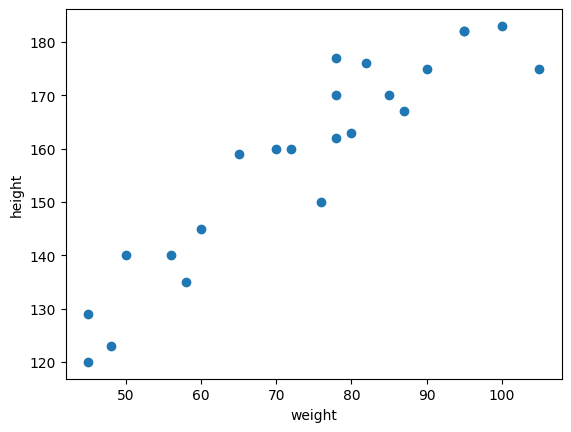

In [28]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel("height")
plt.show()

In [29]:
# Dividing into dependant and independant
X=df[['Weight']]  # Independant (double brackets due to reshaping it to 2-d)
y=df[['Height']]  # Dependant

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [31]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Train the simple linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [33]:
slope = reg.coef_
intercept = reg.intercept_
print("The slope of the best fit line: ",slope)
print("The intercept of the best fit line: ",intercept)

The slope of the best fit line:  [[17.03440872]]
The intercept of the best fit line:  [157.5]


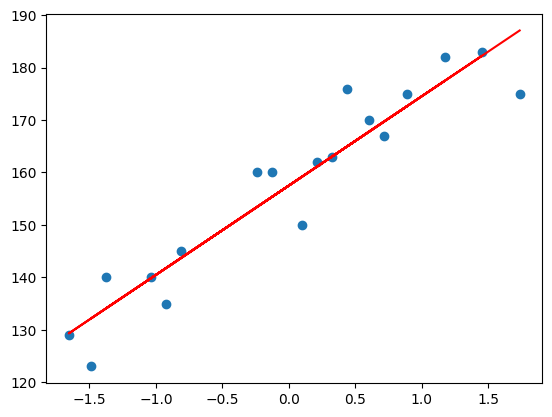

In [34]:
# Best fit line for train data
plt.scatter(X_train,y_train)
plt.plot(X_train,reg.predict(X_train),'r')
plt.show()

In [35]:
y_pred_test = reg.predict(X_test)
y_pred_test

array([[161.08467086],
       [161.08467086],
       [129.3041561 ],
       [177.45645118],
       [148.56507414]])

In [36]:
# Performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
109.77592599051664
10.477400726827081


In [37]:
# R-square 
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
score

0.776986986042344

In [38]:
# Adjusted R-square
adj = 1 - (1-score)*(len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)
adj

0.7026493147231252

In [41]:
# New unseen data point 
weight = 80
scaled_w = scaler.transform([[80]])
scaled_w

d:\Python\CODE\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [46]:
print("The prediction of height for 80 kg is :",reg.predict(scaled_w))

The prediction of height for 80 kg is : [[163.01076266]]


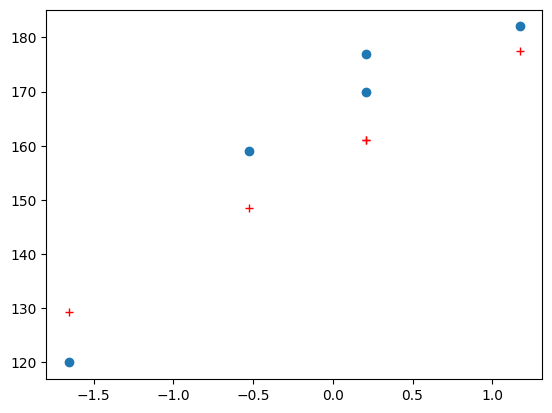

In [52]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test,'r+')
plt.show()

In [54]:
residuals = y_test - y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


The normal distribution which is our general assumption in Linear regression shows the model is good.

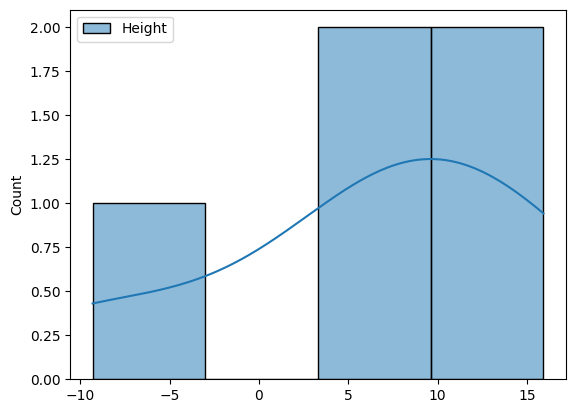

In [55]:
import seaborn as sns
sns.histplot(residuals,kde=True)
plt.show()